In [1]:
from inspect_ai.log import EvalLog, read_eval_log

log = read_eval_log("../logs/surtees_eval.eval")

In [2]:
control_1_visual_samples = []
control_1_spatial_samples = []
control_2_visual_samples = []
control_2_spatial_samples = []
level_1_visual_samples = []
level_1_spatial_samples = []
level_2_visual_samples = []
level_2_spatial_samples = []

assert log.samples is not None
for sample in log.samples:
    if sample.metadata["stimulus_set"] == "control_1" and sample.metadata["question_type"] == "visual":
        control_1_visual_samples.append(sample)
    elif sample.metadata["stimulus_set"] == "control_1" and sample.metadata["question_type"] == "spatial":
        control_1_spatial_samples.append(sample)
    elif sample.metadata["stimulus_set"] == "control_2" and sample.metadata["question_type"] == "visual":
        control_2_visual_samples.append(sample)
    elif sample.metadata["stimulus_set"] == "control_2" and sample.metadata["question_type"] == "spatial":
        control_2_spatial_samples.append(sample)
    elif sample.metadata["stimulus_set"] == "level_1" and sample.metadata["question_type"] == "visual":
        level_1_visual_samples.append(sample)
    elif sample.metadata["stimulus_set"] == "level_1" and sample.metadata["question_type"] == "spatial":
        level_1_spatial_samples.append(sample)
    elif sample.metadata["stimulus_set"] == "level_2" and sample.metadata["question_type"] == "visual":
        level_2_visual_samples.append(sample)
    elif sample.metadata["stimulus_set"] == "level_2" and sample.metadata["question_type"] == "spatial":
        level_2_spatial_samples.append(sample)

In [4]:
# now calculate the accuracy for each 
from inspect_ai.log import EvalSample


def calculate_accuracy(samples: list[EvalSample]):
    total = len(samples)
    if total == 0:
        return 0
    num_correct = 0
    for sample in samples:
        assert sample.scores is not None
        if sample.scores["simple_accuracy_scorer"].value == "C":
            num_correct += 1

    return num_correct/total

control_1_visual_acc = calculate_accuracy(control_1_visual_samples)
control_1_spatial_acc = calculate_accuracy(control_1_spatial_samples)
control_2_visual_acc = calculate_accuracy(control_2_visual_samples)
control_2_spatial_acc = calculate_accuracy(control_2_spatial_samples)

level_1_visual_acc = calculate_accuracy(level_1_visual_samples)
level_1_spatial_acc = calculate_accuracy(level_1_spatial_samples)
level_2_visual_acc = calculate_accuracy(level_2_visual_samples)
level_2_spatial_acc = calculate_accuracy(level_2_spatial_samples)

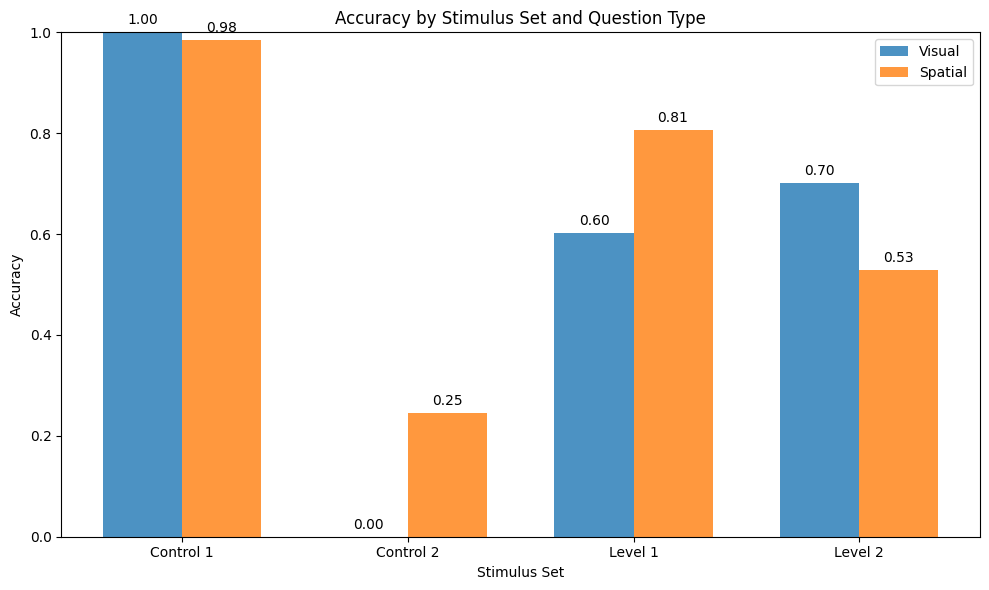

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the grouped bar chart
stimulus_sets = ['Control 1', 'Control 2', 'Level 1', 'Level 2']
visual_accuracies = [control_1_visual_acc, control_2_visual_acc, level_1_visual_acc, level_2_visual_acc]
spatial_accuracies = [control_1_spatial_acc, control_2_spatial_acc, level_1_spatial_acc, level_2_spatial_acc]

# Set up the bar chart
x = np.arange(len(stimulus_sets))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, visual_accuracies, width, label='Visual', alpha=0.8)
bars2 = ax.bar(x + width/2, spatial_accuracies, width, label='Spatial', alpha=0.8)

# Customize the chart
ax.set_xlabel('Stimulus Set')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Stimulus Set and Question Type')
ax.set_xticks(x)
ax.set_xticklabels(stimulus_sets)
ax.legend()
ax.set_ylim(0, 1.0)

# Add value labels on top of bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()

In [6]:
from collections import defaultdict

def calculate_accuracy_by_rotation(samples: list[EvalSample]):
    """Calculate accuracy grouped by figure rotation angle"""
    rotation_groups = defaultdict(list)
    
    # Group samples by rotation angle
    for sample in samples:
        rotation = sample.metadata["stimulus_metadata"]["figure_rotation"]
        rotation_groups[rotation].append(sample)
    
    # Calculate accuracy for each rotation
    rotation_accuracies = {}
    for rotation, group_samples in rotation_groups.items():
        rotation_accuracies[rotation] = calculate_accuracy(group_samples)
    
    return rotation_accuracies

# Calculate accuracy by rotation for each category
categories = {
    "Control 1 Visual": control_1_visual_samples,
    "Control 1 Spatial": control_1_spatial_samples,
    "Control 2 Visual": control_2_visual_samples,
    "Control 2 Spatial": control_2_spatial_samples,
    "Level 1 Visual": level_1_visual_samples,
    "Level 1 Spatial": level_1_spatial_samples,
    "Level 2 Visual": level_2_visual_samples,
    "Level 2 Spatial": level_2_spatial_samples
}

rotation_data = {}
for category_name, samples in categories.items():
    rotation_data[category_name] = calculate_accuracy_by_rotation(samples)

# Print summary of available rotations for each category
print("Available rotations by category:")
for category, data in rotation_data.items():
    rotations = sorted(data.keys())
    print(f"{category}: {rotations}")
    print(f"  Sample data: {[(rot, f'{acc:.3f}') for rot, acc in sorted(data.items())]}")
    print()

Available rotations by category:
Control 1 Visual: [90.0, 270.0]
  Sample data: [(90.0, '1.000'), (270.0, '1.000')]

Control 1 Spatial: [30.0, 90.0, 150.0, 210.0, 270.0, 330.0]
  Sample data: [(30.0, '1.000'), (90.0, '1.000'), (150.0, '0.938'), (210.0, '1.000'), (270.0, '0.969'), (330.0, '1.000')]

Control 2 Visual: []
  Sample data: []

Control 2 Spatial: [30.0, 90.0, 150.0, 210.0, 270.0, 330.0]
  Sample data: [(30.0, '0.125'), (90.0, '0.903'), (150.0, '0.062'), (210.0, '0.094'), (270.0, '0.156'), (330.0, '0.156')]

Level 1 Visual: [30.0, 90.0, 150.0, 210.0, 270.0, 330.0]
  Sample data: [(30.0, '0.625'), (90.0, '0.677'), (150.0, '0.438'), (210.0, '0.750'), (270.0, '0.312'), (330.0, '0.812')]

Level 1 Spatial: [30.0, 90.0, 150.0, 210.0, 270.0, 330.0]
  Sample data: [(30.0, '0.938'), (90.0, '0.710'), (150.0, '0.844'), (210.0, '0.969'), (270.0, '0.500'), (330.0, '0.875')]

Level 2 Visual: [30.0, 90.0, 150.0, 210.0, 270.0, 330.0]
  Sample data: [(30.0, '0.656'), (90.0, '0.742'), (150.0, '

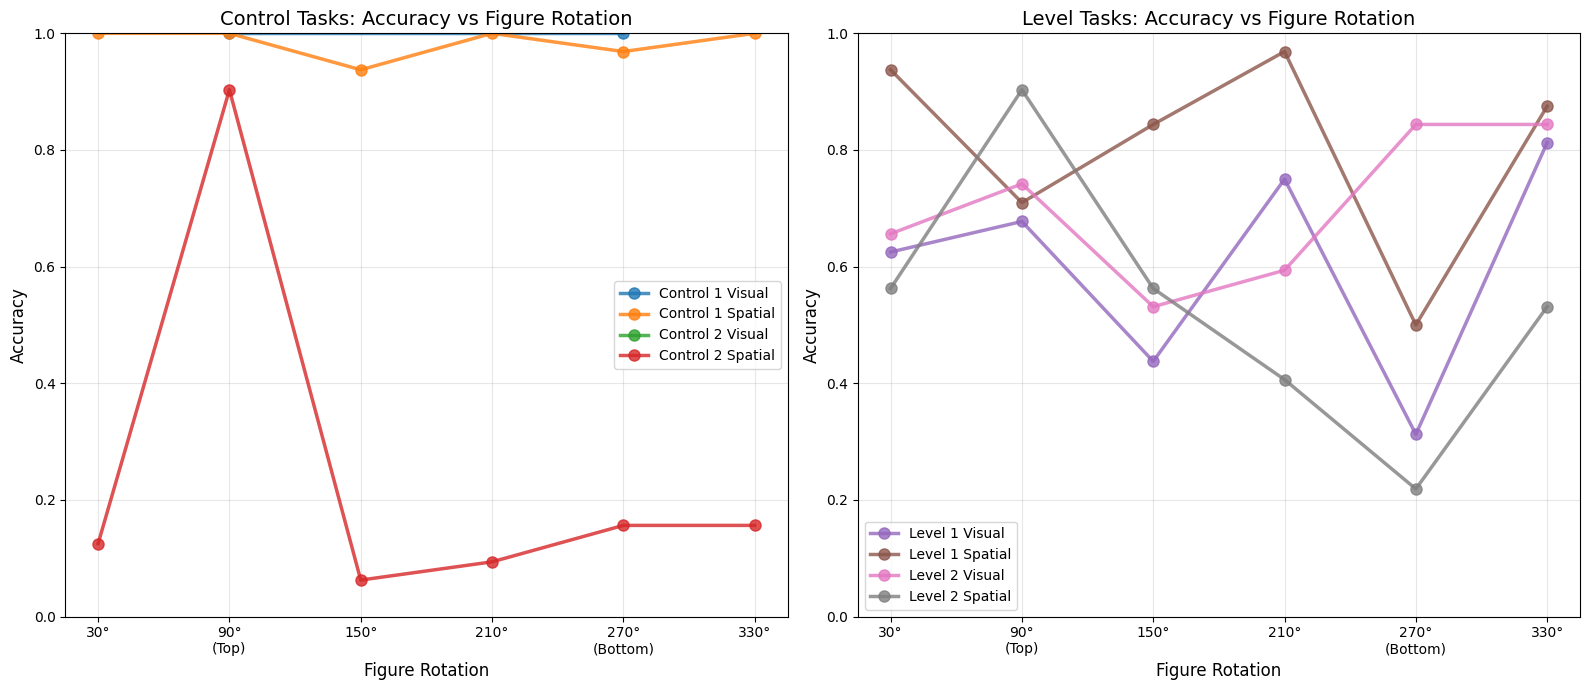


Control Tasks Summary:
  Control 1 Visual: Mean=1.000, Std=0.000, Range=1.000-1.000
  Control 1 Spatial: Mean=0.984, Std=0.024, Range=0.938-1.000
  Control 2 Spatial: Mean=0.249, Std=0.294, Range=0.062-0.903

Level Tasks Summary:
  Level 1 Visual: Mean=0.602, Std=0.175, Range=0.312-0.812
  Level 1 Spatial: Mean=0.806, Std=0.160, Range=0.500-0.969
  Level 2 Visual: Mean=0.702, Std=0.119, Range=0.531-0.844
  Level 2 Spatial: Mean=0.531, Std=0.206, Range=0.219-0.903

Rotation angles tested: [30, 90, 150, 210, 270, 330]


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get all unique rotation angles across all categories
all_rotations = set()
for data in rotation_data.values():
    all_rotations.update(data.keys())
all_rotations = sorted(all_rotations)

# Separate control and level categories
control_categories = {k: v for k, v in rotation_data.items() if k.startswith('Control')}
level_categories = {k: v for k, v in rotation_data.items() if k.startswith('Level')}

# Define colors for each category
colors = {
    'Control 1 Visual': '#1f77b4',    # blue
    'Control 1 Spatial': '#ff7f0e',   # orange
    'Control 2 Visual': '#2ca02c',    # green
    'Control 2 Spatial': '#d62728',   # red
    'Level 1 Visual': '#9467bd',      # purple
    'Level 1 Spatial': '#8c564b',     # brown
    'Level 2 Visual': '#e377c2',      # pink
    'Level 2 Spatial': '#7f7f7f'      # gray
}

# Create rotation labels with directions
rotation_labels = []
direction_map = {0: 'Left', 90: 'Top', 180: 'Right', 270: 'Bottom'}
for rot in all_rotations:
    direction = direction_map.get(rot, '')
    if direction:
        rotation_labels.append(f'{int(rot)}°\n({direction})')
    else:
        rotation_labels.append(f'{int(rot)}°')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Function to plot categories
def plot_categories(ax, categories_dict, title):
    for category_name, data in categories_dict.items():
        # Extract rotations and accuracies for this category
        rotations = []
        accuracies = []
        for rotation in all_rotations:
            if rotation in data:
                rotations.append(rotation)
                accuracies.append(data[rotation])
        
        # Plot the line
        ax.plot(rotations, accuracies, 
               color=colors[category_name], linewidth=2.5, 
               marker='o', markersize=8,
               label=category_name, alpha=0.8)
    
    # Customize the plot
    ax.set_xlabel('Figure Rotation', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.set_ylim(0, 1.0)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)
    
    # Set x-axis ticks with directional labels
    ax.set_xticks(all_rotations)
    ax.set_xticklabels(rotation_labels, fontsize=10)

# Plot control categories
plot_categories(ax1, control_categories, 'Control Tasks: Accuracy vs Figure Rotation')

# Plot level categories  
plot_categories(ax2, level_categories, 'Level Tasks: Accuracy vs Figure Rotation')

plt.tight_layout()
plt.show()

# Print summary statistics for each group
print("\nControl Tasks Summary:")
for category_name, data in control_categories.items():
    if data:
        accuracies = list(data.values())
        mean_acc = np.mean(accuracies)
        std_acc = np.std(accuracies)
        print(f"  {category_name}: Mean={mean_acc:.3f}, Std={std_acc:.3f}, Range={min(accuracies):.3f}-{max(accuracies):.3f}")

print("\nLevel Tasks Summary:")
for category_name, data in level_categories.items():
    if data:
        accuracies = list(data.values())
        mean_acc = np.mean(accuracies)
        std_acc = np.std(accuracies)
        print(f"  {category_name}: Mean={mean_acc:.3f}, Std={std_acc:.3f}, Range={min(accuracies):.3f}-{max(accuracies):.3f}")

print(f"\nRotation angles tested: {[int(rot) for rot in all_rotations]}")

# arrow version

In [45]:
log = read_eval_log("../logs/arrow_men_large.eval")

In [46]:
control_1_visual_samples = []
control_1_spatial_samples = []
control_2_visual_samples = []
control_2_spatial_samples = []
level_1_visual_samples = []
level_1_spatial_samples = []
level_2_visual_samples = []
level_2_spatial_samples = []

assert log.samples is not None
for sample in log.samples:
    if sample.metadata["stimulus_set"] == "control_1" and sample.metadata["question_type"] == "visual":
        control_1_visual_samples.append(sample)
    elif sample.metadata["stimulus_set"] == "control_1" and sample.metadata["question_type"] == "spatial":
        control_1_spatial_samples.append(sample)
    elif sample.metadata["stimulus_set"] == "control_2" and sample.metadata["question_type"] == "visual":
        control_2_visual_samples.append(sample)
    elif sample.metadata["stimulus_set"] == "control_2" and sample.metadata["question_type"] == "spatial":
        control_2_spatial_samples.append(sample)
    elif sample.metadata["stimulus_set"] == "level_1" and sample.metadata["question_type"] == "visual":
        level_1_visual_samples.append(sample)
    elif sample.metadata["stimulus_set"] == "level_1" and sample.metadata["question_type"] == "spatial":
        level_1_spatial_samples.append(sample)
    elif sample.metadata["stimulus_set"] == "level_2" and sample.metadata["question_type"] == "visual":
        level_2_visual_samples.append(sample)
    elif sample.metadata["stimulus_set"] == "level_2" and sample.metadata["question_type"] == "spatial":
        level_2_spatial_samples.append(sample)

In [47]:
# now calculate the accuracy for each 
from inspect_ai.log import EvalSample


def calculate_accuracy(samples: list[EvalSample]):
    total = len(samples)
    if total == 0:
        return 0
    num_correct = 0
    for sample in samples:
        assert sample.scores is not None
        if sample.scores["simple_accuracy_scorer"].value == "C":
            num_correct += 1

    return num_correct/total

control_1_visual_acc = calculate_accuracy(control_1_visual_samples)
control_1_spatial_acc = calculate_accuracy(control_1_spatial_samples)
control_2_visual_acc = calculate_accuracy(control_2_visual_samples)
control_2_spatial_acc = calculate_accuracy(control_2_spatial_samples)

level_1_visual_acc = calculate_accuracy(level_1_visual_samples)
level_1_spatial_acc = calculate_accuracy(level_1_spatial_samples)
level_2_visual_acc = calculate_accuracy(level_2_visual_samples)
level_2_spatial_acc = calculate_accuracy(level_2_spatial_samples)

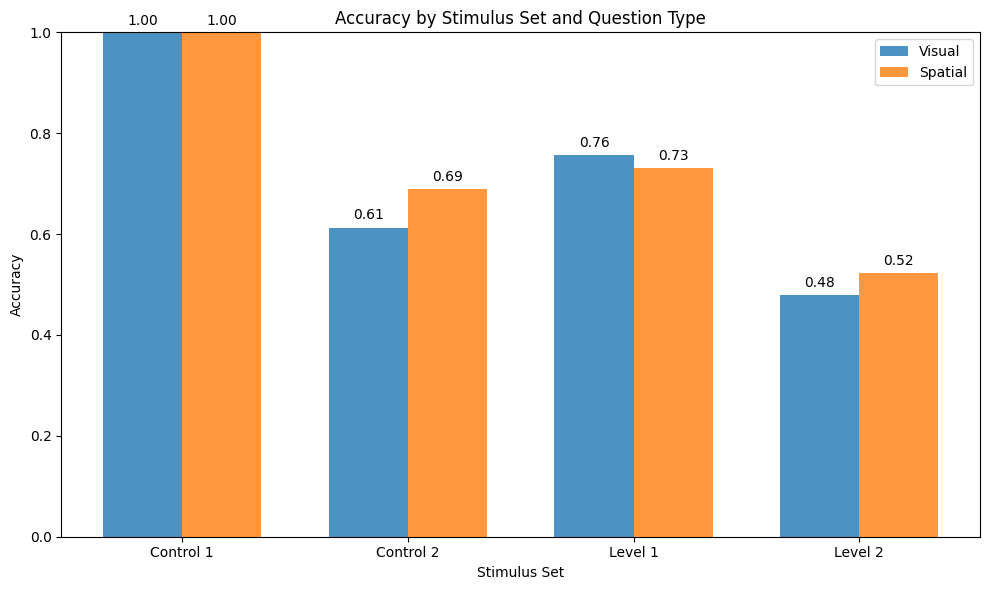

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the grouped bar chart
stimulus_sets = ['Control 1', 'Control 2', 'Level 1', 'Level 2']
visual_accuracies = [control_1_visual_acc, control_2_visual_acc, level_1_visual_acc, level_2_visual_acc]
spatial_accuracies = [control_1_spatial_acc, control_2_spatial_acc, level_1_spatial_acc, level_2_spatial_acc]

# Set up the bar chart
x = np.arange(len(stimulus_sets))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, visual_accuracies, width, label='Visual', alpha=0.8)
bars2 = ax.bar(x + width/2, spatial_accuracies, width, label='Spatial', alpha=0.8)

# Customize the chart
ax.set_xlabel('Stimulus Set')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Stimulus Set and Question Type')
ax.set_xticks(x)
ax.set_xticklabels(stimulus_sets)
ax.legend()
ax.set_ylim(0, 1.0)

# Add value labels on top of bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()

In [55]:
from collections import defaultdict

def calculate_accuracy_by_rotation(samples: list[EvalSample], round_to_degrees=10):
    """Calculate accuracy grouped by figure rotation angle"""
    rotation_groups = defaultdict(list)
    
    # Group samples by rounded rotation angle
    for sample in samples:
        original_rotation = sample.metadata["stimulus_metadata"]["figure_rotation"]
        # Round to nearest specified degrees (5 or 10)
        rounded_rotation = round(original_rotation / round_to_degrees) * round_to_degrees
        rotation_groups[rounded_rotation].append(sample)
    
    # Calculate accuracy for each rotation
    rotation_accuracies = {}
    for rotation, group_samples in rotation_groups.items():
        rotation_accuracies[rotation] = calculate_accuracy(group_samples)
    
    return rotation_accuracies

# Calculate accuracy by rotation for each category (rounded to nearest 10 degrees)
categories = {
    "Control 1 Visual": control_1_visual_samples,
    "Control 1 Spatial": control_1_spatial_samples,
    "Control 2 Visual": control_2_visual_samples,
    "Control 2 Spatial": control_2_spatial_samples,
    "Level 1 Visual": level_1_visual_samples,
    "Level 1 Spatial": level_1_spatial_samples,
    "Level 2 Visual": level_2_visual_samples,
    "Level 2 Spatial": level_2_spatial_samples
}

rotation_data = {}
for category_name, samples in categories.items():
    rotation_data[category_name] = calculate_accuracy_by_rotation(samples, round_to_degrees=5)

# Print summary of available rotations for each category
print("Available rotations by category (rounded to nearest 10°):")
for category, data in rotation_data.items():
    rotations = sorted(data.keys())
    print(f"{category}: {rotations}")
    print(f"  Sample data: {[(rot, f'{acc:.3f}') for rot, acc in sorted(data.items())]}")
    print()

Available rotations by category (rounded to nearest 10°):
Control 1 Visual: [70, 75, 80, 85, 90, 95, 100, 105, 110]
  Sample data: [(70, '1.000'), (75, '1.000'), (80, '0.992'), (85, '1.000'), (90, '1.000'), (95, '1.000'), (100, '1.000'), (105, '1.000'), (110, '1.000')]

Control 1 Spatial: [70, 75, 80, 85, 90, 95, 100, 105, 110]
  Sample data: [(70, '1.000'), (75, '1.000'), (80, '1.000'), (85, '1.000'), (90, '1.000'), (95, '0.992'), (100, '0.991'), (105, '1.000'), (110, '1.000')]

Control 2 Visual: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360]
  Sample data: [(0, '0.333'), (5, '0.333'), (10, '0.333'), (15, '0.556'), (20, '0.222'), (25, '0.176'), (30, '0.125'), (35, '0.136'), (40, '0.000'), (45,

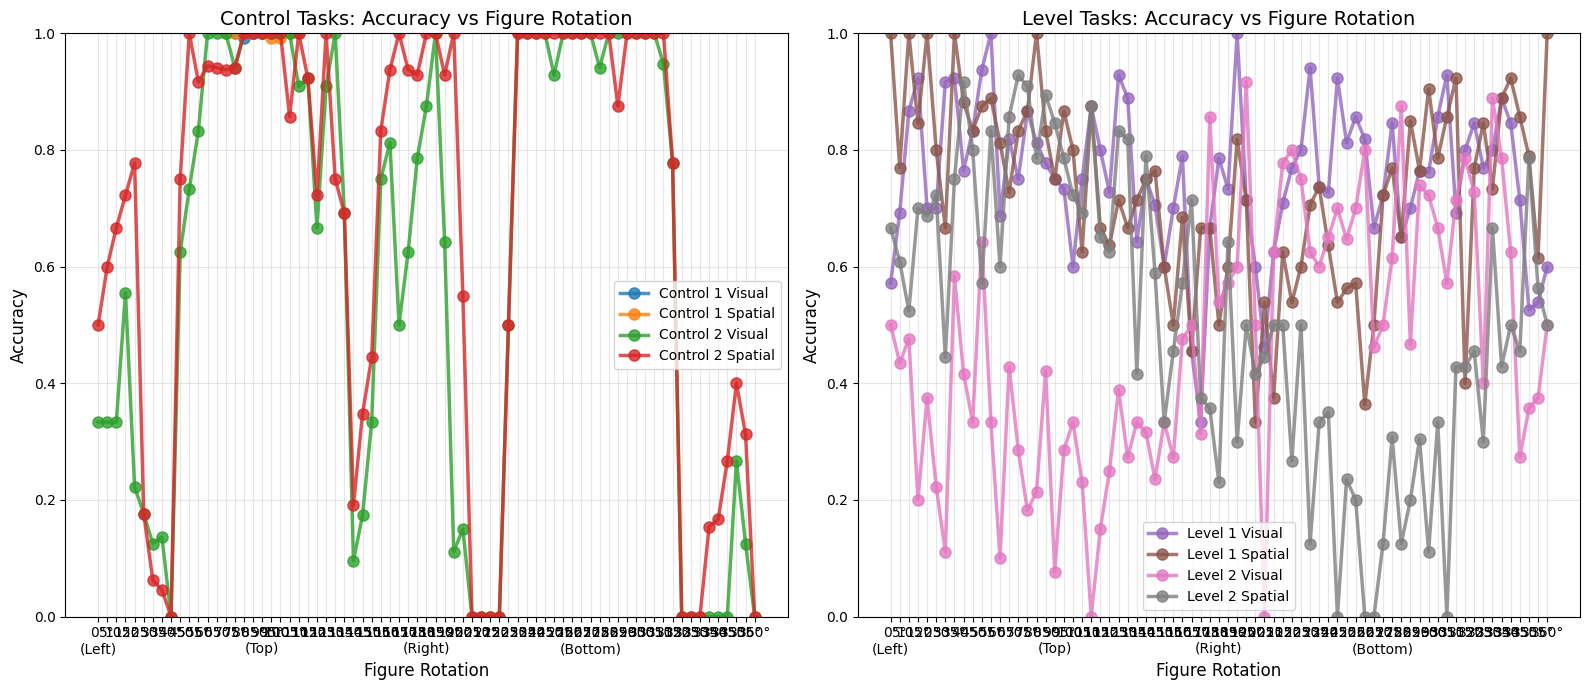


Control Tasks Summary:
  Control 1 Visual: Mean=0.999, Std=0.002, Range=0.992-1.000
  Control 1 Spatial: Mean=0.998, Std=0.004, Range=0.991-1.000
  Control 2 Visual: Mean=0.614, Std=0.399, Range=0.000-1.000
  Control 2 Spatial: Mean=0.691, Std=0.375, Range=0.000-1.000

Level Tasks Summary:
  Level 1 Visual: Mean=0.756, Std=0.128, Range=0.333-1.000
  Level 1 Spatial: Mean=0.731, Std=0.161, Range=0.333-1.000
  Level 2 Visual: Mean=0.476, Std=0.226, Range=0.000-0.917
  Level 2 Spatial: Mean=0.510, Std=0.250, Range=0.000-0.929

Rotation angles tested: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360]


In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Get all unique rotation angles across all categories
all_rotations = set()
for data in rotation_data.values():
    all_rotations.update(data.keys())
all_rotations = sorted(all_rotations)

# Separate control and level categories
control_categories = {k: v for k, v in rotation_data.items() if k.startswith('Control')}
level_categories = {k: v for k, v in rotation_data.items() if k.startswith('Level')}

# Define colors for each category
colors = {
    'Control 1 Visual': '#1f77b4',    # blue
    'Control 1 Spatial': '#ff7f0e',   # orange
    'Control 2 Visual': '#2ca02c',    # green
    'Control 2 Spatial': '#d62728',   # red
    'Level 1 Visual': '#9467bd',      # purple
    'Level 1 Spatial': '#8c564b',     # brown
    'Level 2 Visual': '#e377c2',      # pink
    'Level 2 Spatial': '#7f7f7f'      # gray
}

# Create rotation labels with directions
rotation_labels = []
direction_map = {0: 'Left', 90: 'Top', 180: 'Right', 270: 'Bottom'}
for rot in all_rotations:
    direction = direction_map.get(rot, '')
    if direction:
        rotation_labels.append(f'{int(rot)}°\n({direction})')
    else:
        rotation_labels.append(f'{int(rot)}°')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Function to plot categories
def plot_categories(ax, categories_dict, title):
    for category_name, data in categories_dict.items():
        # Extract rotations and accuracies for this category
        rotations = []
        accuracies = []
        for rotation in all_rotations:
            if rotation in data:
                rotations.append(rotation)
                accuracies.append(data[rotation])
        
        # Plot the line
        ax.plot(rotations, accuracies, 
               color=colors[category_name], linewidth=2.5, 
               marker='o', markersize=8,
               label=category_name, alpha=0.8)
    
    # Customize the plot
    ax.set_xlabel('Figure Rotation', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.set_ylim(0, 1.0)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)
    
    # Set x-axis ticks with directional labels
    ax.set_xticks(all_rotations)
    ax.set_xticklabels(rotation_labels, fontsize=10)

# Plot control categories
plot_categories(ax1, control_categories, 'Control Tasks: Accuracy vs Figure Rotation')

# Plot level categories  
plot_categories(ax2, level_categories, 'Level Tasks: Accuracy vs Figure Rotation')

plt.tight_layout()
plt.show()

# Print summary statistics for each group
print("\nControl Tasks Summary:")
for category_name, data in control_categories.items():
    if data:
        accuracies = list(data.values())
        mean_acc = np.mean(accuracies)
        std_acc = np.std(accuracies)
        print(f"  {category_name}: Mean={mean_acc:.3f}, Std={std_acc:.3f}, Range={min(accuracies):.3f}-{max(accuracies):.3f}")

print("\nLevel Tasks Summary:")
for category_name, data in level_categories.items():
    if data:
        accuracies = list(data.values())
        mean_acc = np.mean(accuracies)
        std_acc = np.std(accuracies)
        print(f"  {category_name}: Mean={mean_acc:.3f}, Std={std_acc:.3f}, Range={min(accuracies):.3f}-{max(accuracies):.3f}")

print(f"\nRotation angles tested: {[int(rot) for rot in all_rotations]}")

Creating individual plots for each category:


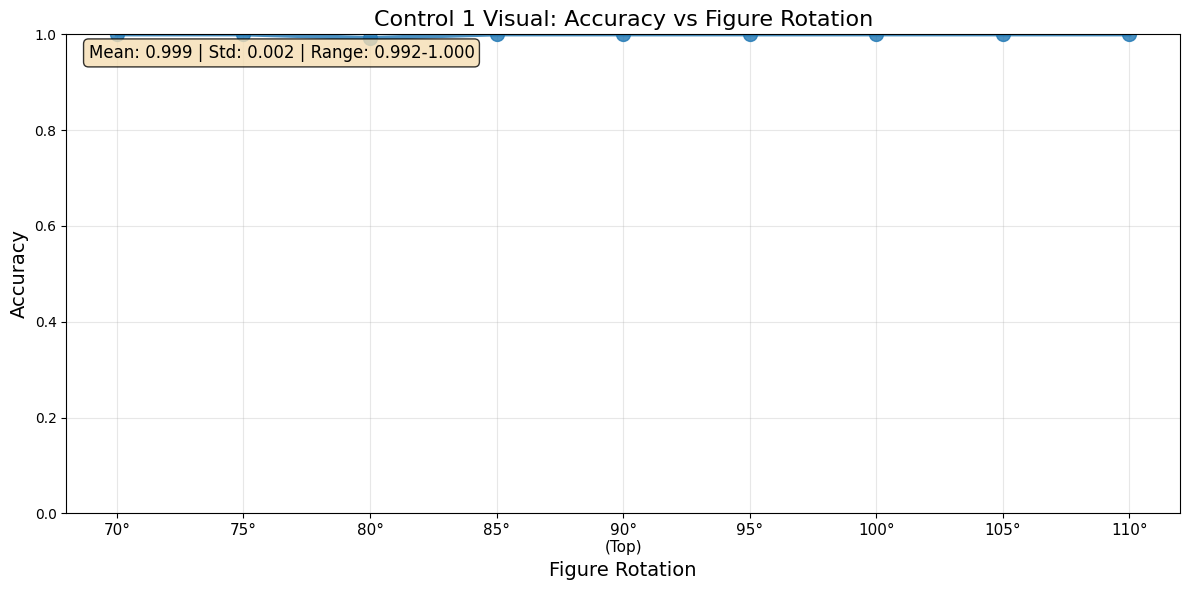


Control 1 Visual completed


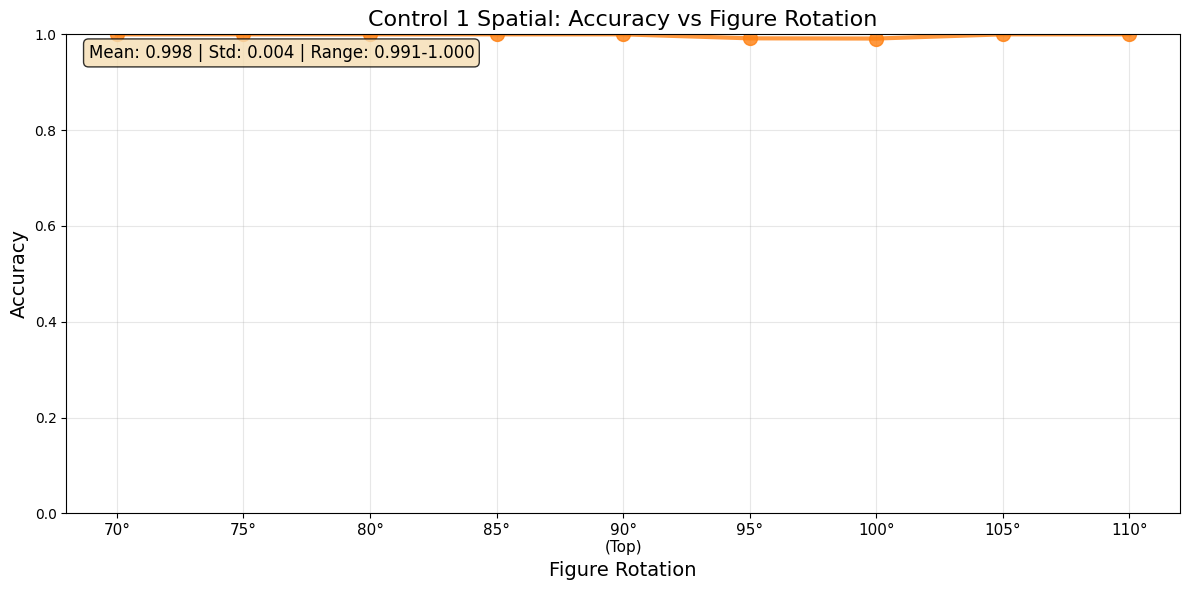


Control 1 Spatial completed


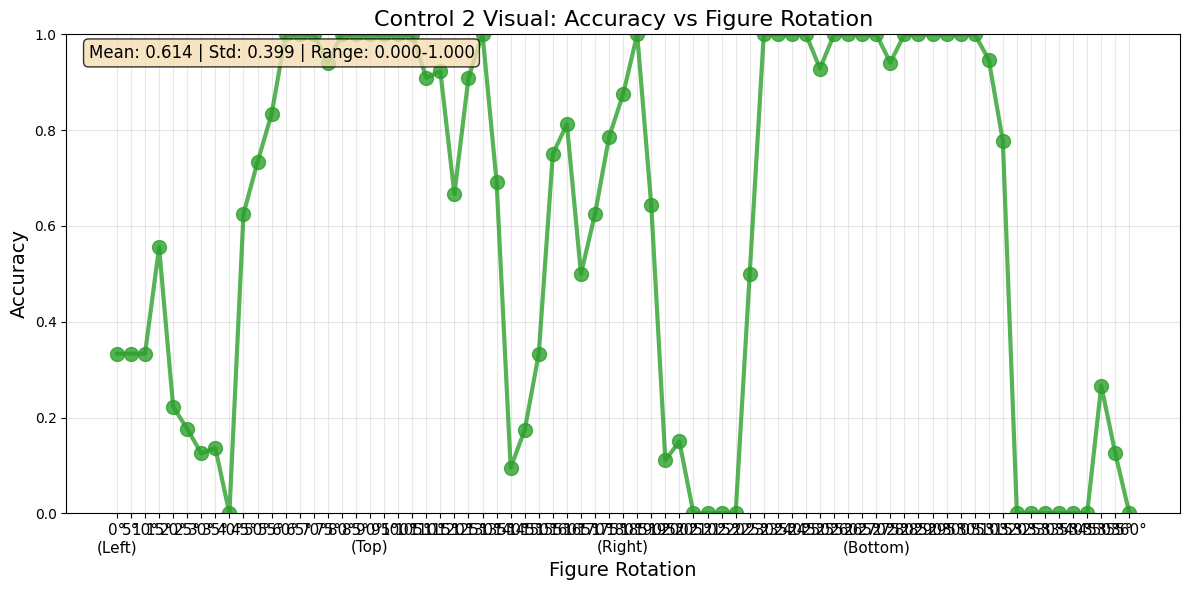


Control 2 Visual completed


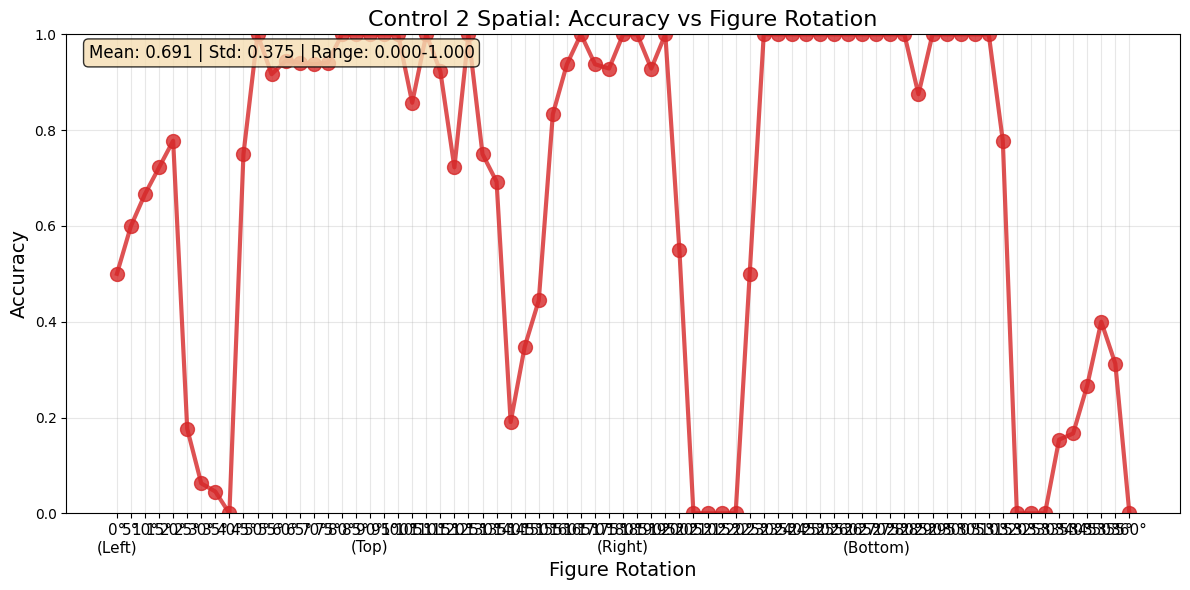


Control 2 Spatial completed


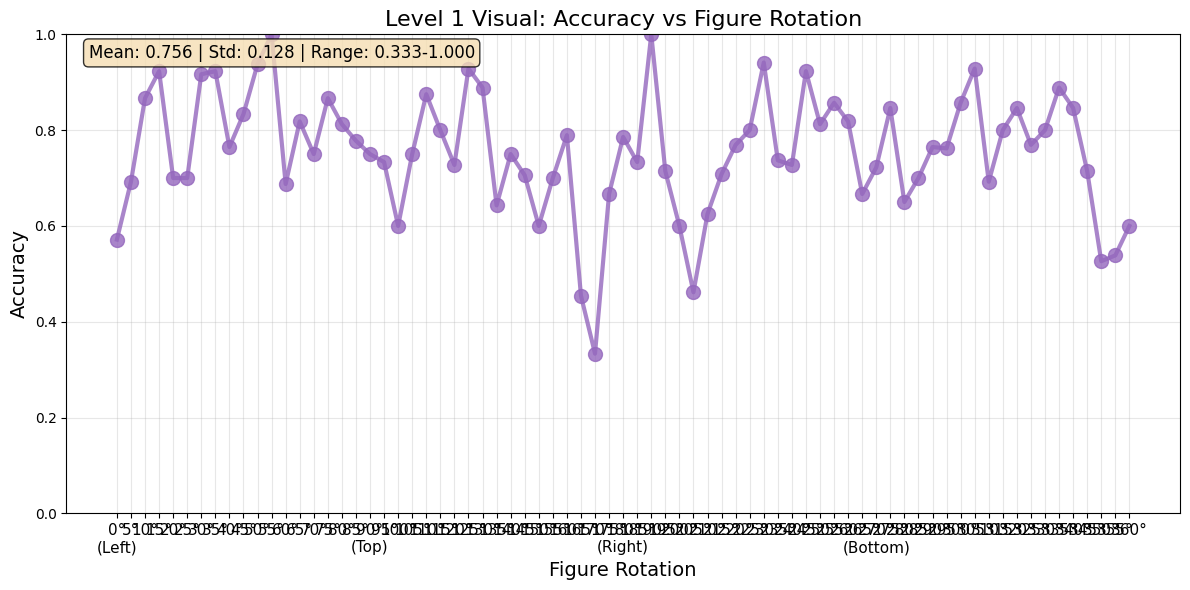


Level 1 Visual completed


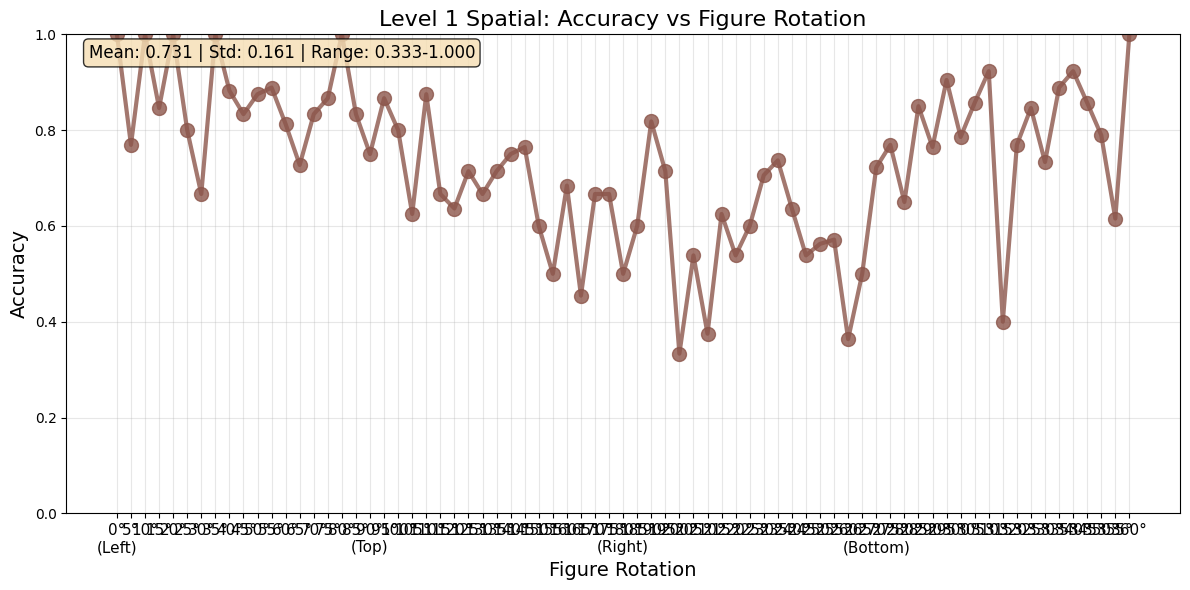


Level 1 Spatial completed


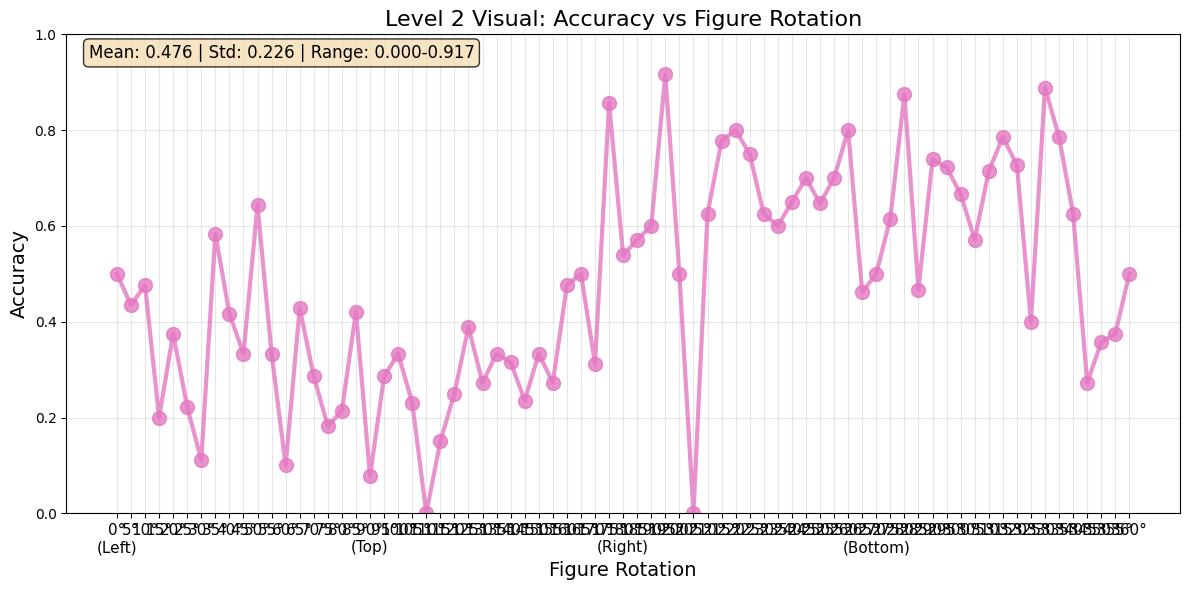


Level 2 Visual completed


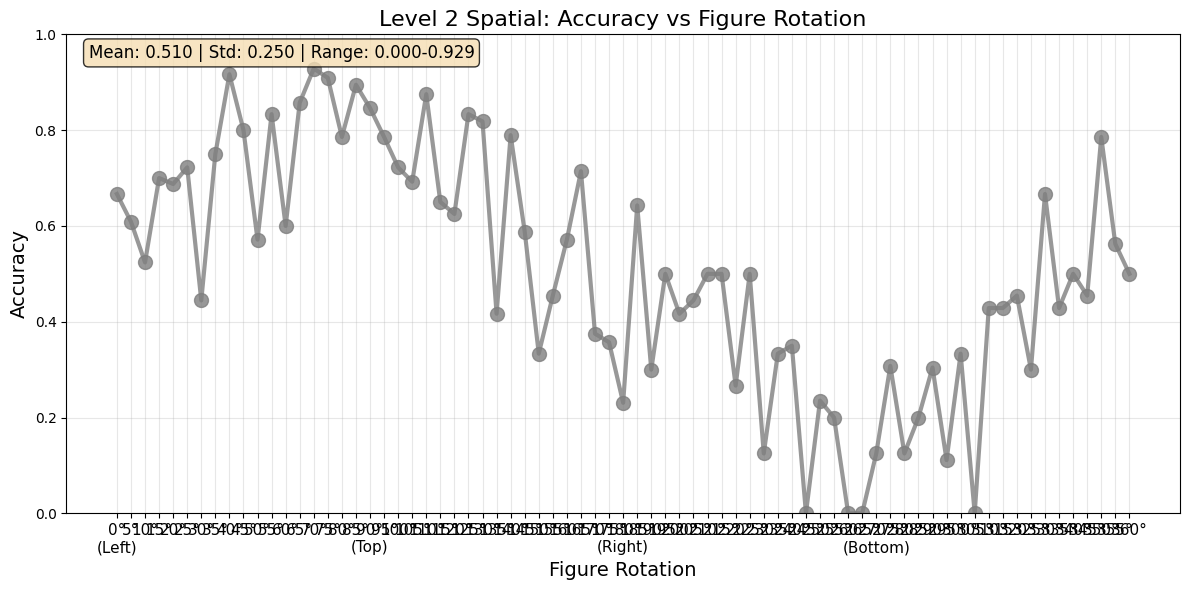


Level 2 Spatial completed


In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Get all unique rotation angles across all categories
all_rotations = set()
for data in rotation_data.values():
    all_rotations.update(data.keys())
all_rotations = sorted(all_rotations)

# Define colors for each category
colors = {
    'Control 1 Visual': '#1f77b4',    # blue
    'Control 1 Spatial': '#ff7f0e',   # orange
    'Control 2 Visual': '#2ca02c',    # green
    'Control 2 Spatial': '#d62728',   # red
    'Level 1 Visual': '#9467bd',      # purple
    'Level 1 Spatial': '#8c564b',     # brown
    'Level 2 Visual': '#e377c2',      # pink
    'Level 2 Spatial': '#7f7f7f'      # gray
}

# Create rotation labels with directions
direction_map = {0: 'Left', 90: 'Top', 180: 'Right', 270: 'Bottom'}

def create_individual_plot(category_name, data):
    """Create a separate plot for each category"""
    if not data:  # Skip empty categories
        return
    
    # Create rotation labels for this specific category
    category_rotations = sorted(data.keys())
    rotation_labels = []
    for rot in category_rotations:
        direction = direction_map.get(rot, '')
        if direction:
            rotation_labels.append(f'{int(rot)}°\n({direction})')
        else:
            rotation_labels.append(f'{int(rot)}°')
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Extract rotations and accuracies for this category
    rotations = []
    accuracies = []
    for rotation in category_rotations:
        rotations.append(rotation)
        accuracies.append(data[rotation])
    
    # Plot the line
    ax.plot(rotations, accuracies, 
           color=colors[category_name], linewidth=3, 
           marker='o', markersize=10,
           label=category_name, alpha=0.8)
    
    # Customize the plot
    ax.set_xlabel('Figure Rotation', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_title(f'{category_name}: Accuracy vs Figure Rotation', fontsize=16)
    ax.set_ylim(0, 1.0)
    ax.grid(True, alpha=0.3)
    
    # Set x-axis ticks with directional labels
    ax.set_xticks(category_rotations)
    ax.set_xticklabels(rotation_labels, fontsize=11)
    
    # Add summary statistics as text
    accuracies_list = list(data.values())
    mean_acc = np.mean(accuracies_list)
    std_acc = np.std(accuracies_list)
    min_acc = min(accuracies_list)
    max_acc = max(accuracies_list)
    
    stats_text = f'Mean: {mean_acc:.3f} | Std: {std_acc:.3f} | Range: {min_acc:.3f}-{max_acc:.3f}'
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=12, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    print(f"\n{category_name} completed")

# Create individual plots for each category
print("Creating individual plots for each category:")
for category_name, data in rotation_data.items():
    create_individual_plot(category_name, data)